In [ ]:
# Logan Schraeder
# CS 898 AW - Spring 2025
# Assignment 1-2
# Due 28 March 2025

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from mpl_toolkits.mplot3d import Axes3D

In [16]:
# HMM -> Hidden Markov Model
class HMM(object):

    def __init__(self, transition_matrix,current_state):
        self.transition_matrix = transition_matrix
        self.current_state = current_state

    def filtering(self,observation_matrix):
        new_state = np.dot(observation_matrix,np.dot(self.transition_matrix,self.current_state))
        new_state_normalized = new_state/np.sum(new_state)
        self.current_state = new_state_normalized
        return new_state_normalized

    def prediction(self):
        new_state = np.dot(self.transition_matrix,self.current_state)
        new_state_normalized = new_state/np.sum(new_state)
        self.current_state=new_state_normalized
        return new_state_normalized

    #def plot_state(self):
    def plot_state(self):
        fig = plt.figure()
        ax1 = fig.add_subplot(111, projection='3d')
        # Define xpos and ypos based on your state space
        # Assuming a 4x4 grid for 16 states
        xpos = [i % 4 for i in range(16)]  # x-coordinates for each state
        ypos = [i // 4 for i in range(16)]  # y-coordinates for each state

        zpos = np.zeros(len(self.current_state))
        dx = np.ones(len(self.current_state))
        dy = np.ones(len(self.current_state))
        dz = self.current_state
        ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color='#ce8900')

        # Adjust x and y ticks if necessary
        ax1.set_xticks(range(4))
        ax1.set_yticks(range(4))
        plt.show()

    def create_observation_matrix(self,error_rate, no_discrepancies):
      # no_discrepancies = NUMBER of discrepancies
        sensor_list=[]
        for number in no_discrepancies:
            probability=(1-error_rate)**(4-number)*error_rate**number
            sensor_list.append(probability)
            observation_matrix = np.zeros((len(sensor_list),len(sensor_list)))
            np.fill_diagonal(observation_matrix,sensor_list)
        return observation_matrix


In [3]:
# Code to fill the Transition Matrix based on the initial state @ S8
# Map 44

def fill_transition_matrix(matrix):
    prob_move = 0.8
    prob_stay = 0.2

    # Define the adjacency list with walls considered
    adj_list = {
        0:  [1, 4],    # S8
        1:  [0, 2, 5],    # S3
        2:  [1, 6, 3],    # S7
        3:  [2, 7],    # S6
        4:  [0, 5],  # S15
        5:  [4, 2, 9],    # S13
        6:  [2, 7, 10],    # S12
        7:  [6, 3, 11],    # S14
        8:  [9, 12],  # S4
        9:  [5, 13, 10, 8],   # S10
        10: [9, 6, 11, 14],    # S2
        11: [10, 7, 15],  # S5
        12: [8, 13],  # S16
        13: [9, 12, 14],  # S9
        14: [10, 13, 15],    # S1
        15: [14, 11]     # S11
    }

    num_states = matrix.shape[0]

    for current_state in range(num_states):
        neighbors = adj_list[current_state]
        num_neighbors = len(neighbors)

        # Calculate transition probability to neighbors
        prob_to_neighbor = (prob_move / num_neighbors) if num_neighbors > 0 else 0

        for next_state in range(num_states):
            if next_state in neighbors:
                matrix[current_state, next_state] = prob_to_neighbor
            elif current_state == next_state:
                matrix[current_state, next_state] = prob_stay
            else:
                matrix[current_state, next_state] = 0.0
    return matrix

In [4]:
# Define the wall locations
wall_info = {
    0: [1, 0, 0, 1],  # S8
    1: [1, 0, 0, 0],  # S3
    2: [1, 0, 0, 0],  # S7
    3: [1, 0, 1, 0],  # S6
    4: [0, 1, 0, 1],  # S15
    5: [0, 0, 1, 0],  # S13
    6: [0, 0, 0, 1],  # S12
    7: [0, 0, 1, 0],  # S14
    8: [1, 0, 0, 1],  # S4
    9: [0, 0, 0, 0],  # S10
    10: [0, 0, 0, 0],  # S2
    11: [0, 0, 1, 0],  # S5
    12: [0, 1, 0, 1],  # S16
    13: [0, 1, 0, 0],  # S9
    14: [0, 1, 0, 0],  # S1
    15: [0, 1, 1, 0]   # S11
}

In [19]:
#   define two models
# need to define the transition matrix based on your assigned map.
transition_matrix = fill_transition_matrix(np.zeros((16,16)))
print(transition_matrix)
#transition_matrix =
# need to define the initial state based on your assigned map.
initial_state = np.array([1/16] * 16)
print(initial_state)


# Hints
Model = HMM(transition_matrix,initial_state)
Model2 = HMM(transition_matrix,initial_state)

[[0.2        0.4        0.         0.         0.4        0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.26666667 0.2        0.26666667 0.         0.         0.26666667
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.26666667 0.2        0.26666667 0.         0.
  0.26666667 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.4        0.2        0.         0.
  0.         0.4        0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.4        0.         0.         0.         0.2        0.4
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.26666667 0.         0.26666667 0.2
  0.         0.         0.         0.26666667 0.         0.
  0.         0.         0.         

In [24]:
#   create observation matrices
# need to define the observation matrices based on your assigned map, and assigned sensor readings.

# Sensor readings for S0: NW, NW, N, NE, SWE

# Hints
error = 0.25
observation_matrix_NW1 = Model.create_observation_matrix(error,[0, 1, 1, 1,
                                                               1, 2, 1, 2,
                                                               0, 2, 2, 2,
                                                               1, 2, 2, 2])
observation_matrix_NW2 = Model.create_observation_matrix(error,[0, 1, 1, 1,
                                                               1, 2, 1, 2,
                                                               0, 2, 2, 2,
                                                               1, 2, 2, 2])
observation_matrix_N = Model.create_observation_matrix(error,[0, 0, 0, 0,
                                                               1, 1, 1, 1,
                                                               0, 1, 1, 1,
                                                               1, 1, 1, 1])
observation_matrix_NE = Model.create_observation_matrix(error,[1, 1, 1, 0,
                                                               2, 1, 2, 1,
                                                               1, 2, 2, 2,
                                                               2, 2, 2, 2])
observation_matrix_SWE = Model.create_observation_matrix(error,[2, 3, 3, 2,
                                                                1, 2, 2, 2,
                                                                2, 3, 3, 2,
                                                                1, 2, 2, 1])

# Containerize all the observations so we can just loop through them
observation_matrices = [observation_matrix_NW1, observation_matrix_NW2, observation_matrix_N, observation_matrix_NE, observation_matrix_SWE]

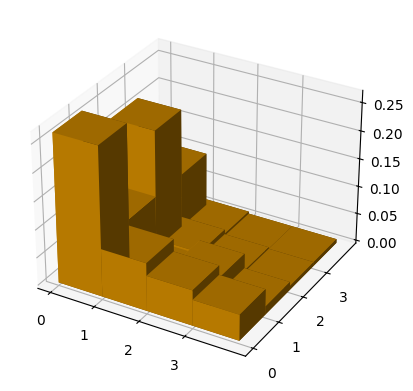

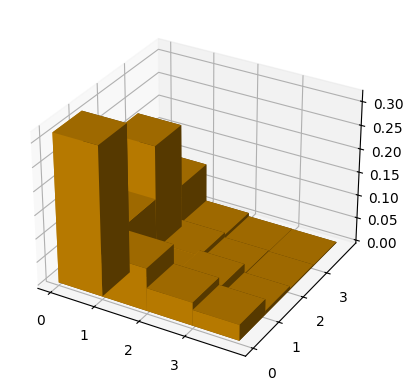

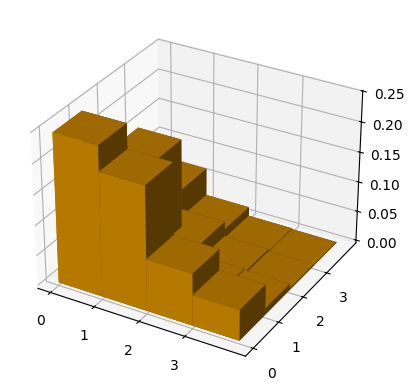

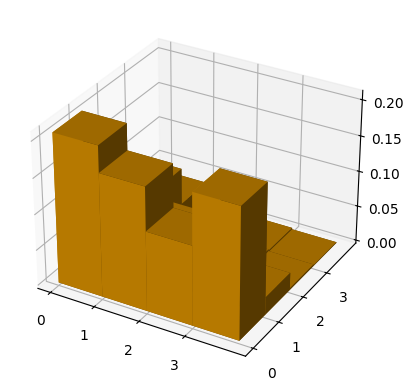

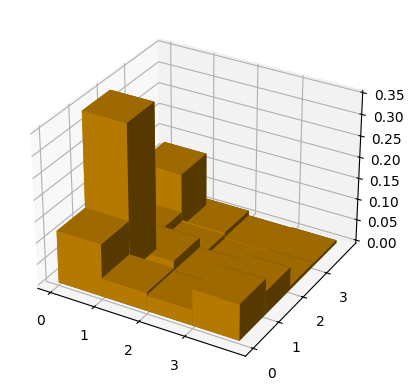

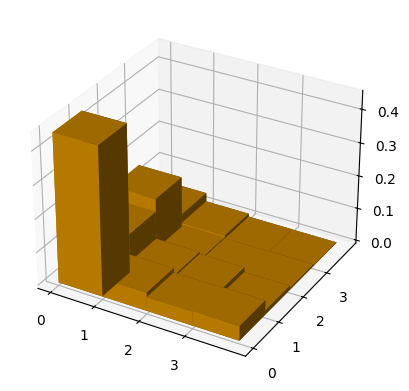

In [25]:
#   localize of the robot using filtering method for each state.

# Iterate through each obseravtion matrix and plot the results to visually localize the robot
for observation_matrix in observation_matrices:
    Model.filtering(observation_matrix)
    Model.plot_state()

# Hints
#state_1 = Model.filtering(observation_matrix_NW1)
#Model.plot_state()

In [ ]:
#   localize of the robot using filtering (three first timesteps) and prediction (two last timesteps)
# Hints
#state_6 = Model2.filtering(observation_matrix_SWE)
#Model2.plot_state()
#state_7 = Model2.filtering(observation_matrix_NW)
#Model2.plot_state()
#state_8 = Model2.filtering(observation_matrix_N)
#Model2.plot_state()
#prediction_1 = Model2.prediction()
#Model2.plot_state()
#prediction_2 = Model2.prediction()
#Model2.plot_state()

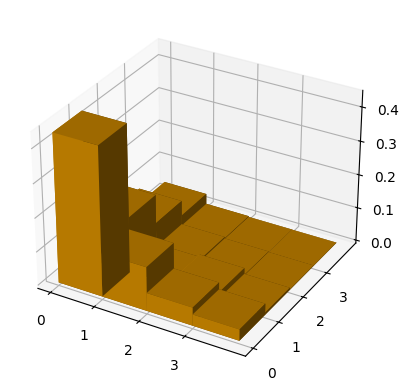

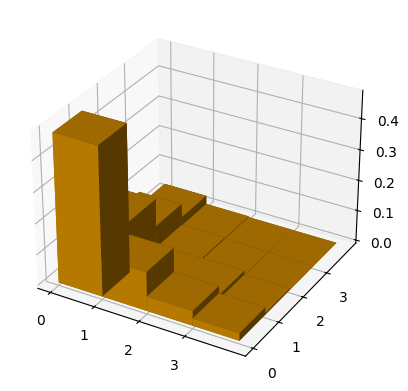

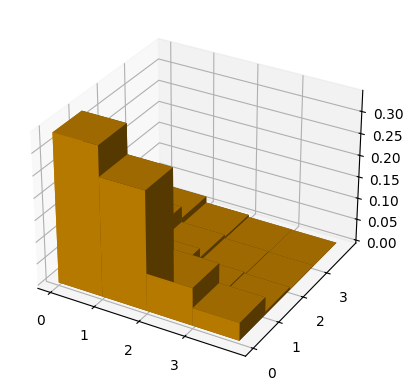

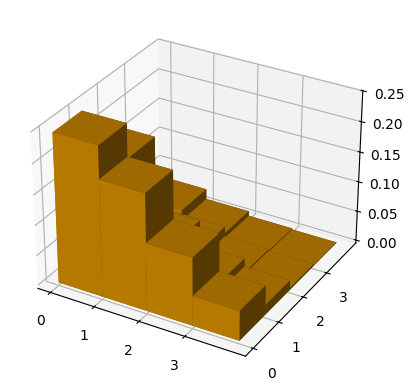

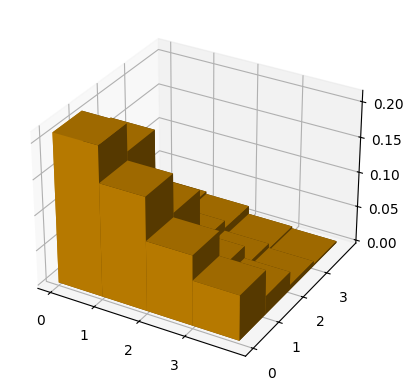

In [28]:
# Same thing as above but with loops
# Use Model.filtering over the first 3 observation matricies
count = 0

for observation_matrix in observation_matrices[:3]:
    Model.filtering(observation_matrix)
    count = count + 1
    Model.plot_state()

# Now predict the last two states
for _ in range(2):
    Model.prediction()
    Model.plot_state()
